In [0]:
!nvidia-smi

Wed Apr 29 23:54:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd ~
!git clone https://github.com/uditarora/fashion-product-classification.git

/root
Cloning into 'fashion-product-classification'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 216 (delta 123), reused 147 (delta 59), pack-reused 0
Receiving objects: 100% (216/216), 1.23 MiB | 3.53 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [0]:
%cd fashion-product-classification
%ls
!git checkout multitask

/root/fashion-product-classification
experiments/                        images/  README.md         src/
fashion_classification.ipynb        LICENSE  requirements.txt  visualize.ipynb
fashion_classification_small.ipynb  main.py  RESULTS.md
Branch 'multitask' set up to track remote branch 'multitask' from 'origin'.
Switched to a new branch 'multitask'


In [0]:
!unzip "/content/gdrive/My Drive/kaggle/fashion-product-images-small.zip" > /dev/null

In [0]:
%rm -r images
%rm styles.csv

In [0]:
%pwd
%ls

experiments/                        main.py           RESULTS.md
fashion_classification.ipynb        myntradataset/    src/
fashion_classification_small.ipynb  README.md         visualize.ipynb
LICENSE                             requirements.txt


In [0]:
!pip install augmentor

In [0]:
%cd ~/fashion-product-classification/

/root/fashion-product-classification


In [0]:
import os

DATA_PATH = 'myntradataset'
CKPT_PATH_TOP20 = '/content/gdrive/My Drive/kaggle/fashion-product-images-small/ckpts_mt/best_val_top20.ckpt'
CKPT_PATH_FT = '/content/gdrive/My Drive/kaggle/fashion-product-images-small/ckpts_mt/best_val_ft.ckpt'

In [0]:
from src.train import *

In [0]:
processor, trainer_top20, dataloaders_top20 = setup_top20(ckpt_path=CKPT_PATH_TOP20, data_path=DATA_PATH)

INFO:fashion:Preprocessing data
INFO:fashion:Cleaning csv
INFO:fashion:Reading clean csv into df
INFO:fashion:Splitting into test-train
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fashion:Sub-splitting based on top-20 classes
INFO:fashion:Create maps for categoires
INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 14400 samples
INFO:fashion:Created val dataset with 3600 samples
INFO:fashion:Created test dataset with 15149 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


INFO:fashion:Creating trainer
INFO:fashion:Loaded previous checkpoint trained on 16 epoch(s) with final loss=0.2940, acc=0.9511


In [0]:
print(trainer_top20.device)
print(next(trainer_top20.model.parameters()).is_cuda)

cuda
True


In [0]:
# trainer_top20.model

In [0]:
trainer_top20.train(20)

INFO:fashion:Running epoch 0/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.8800 Acc: 0.7645
INFO:fashion:train Task2 Acc: 0.9469 Task3 Acc: 0.8516
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.5648 Acc: 0.9033
INFO:fashion:val Task2 Acc: 0.9981 Task3 Acc: 0.9803
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 1/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.5333 Acc: 0.9044
INFO:fashion:train Task2 Acc: 0.9953 Task3 Acc: 0.9792
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3837 Acc: 0.9242
INFO:fashion:val Task2 Acc: 0.9989 Task3 Acc: 0.9892
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 2/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.4035 Acc: 0.9269
INFO:fashion:train Task2 Acc: 0.9965 Task3 Acc: 0.9865
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3945 Acc: 0.9297
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9878
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 3/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.3359 Acc: 0.9369
INFO:fashion:train Task2 Acc: 0.9974 Task3 Acc: 0.9890
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3293 Acc: 0.9333
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9900
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 4/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.2825 Acc: 0.9442
INFO:fashion:train Task2 Acc: 0.9978 Task3 Acc: 0.9922
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3921 Acc: 0.9300
INFO:fashion:val Task2 Acc: 0.9992 Task3 Acc: 0.9858
INFO:fashion:Running epoch 5/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.2312 Acc: 0.9536
INFO:fashion:train Task2 Acc: 0.9986 Task3 Acc: 0.9929
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3002 Acc: 0.9458
INFO:fashion:val Task2 Acc: 0.9997 Task3 Acc: 0.9906
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 6/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1998 Acc: 0.9584
INFO:fashion:train Task2 Acc: 0.9977 Task3 Acc: 0.9938
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3019 Acc: 0.9444
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9906
INFO:fashion:Running epoch 7/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1802 Acc: 0.9643
INFO:fashion:train Task2 Acc: 0.9988 Task3 Acc: 0.9961
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3073 Acc: 0.9481
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9911
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 8/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1811 Acc: 0.9649
INFO:fashion:train Task2 Acc: 0.9979 Task3 Acc: 0.9948
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3017 Acc: 0.9497
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9911
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 9/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1662 Acc: 0.9668
INFO:fashion:train Task2 Acc: 0.9986 Task3 Acc: 0.9958
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3016 Acc: 0.9483
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9917
INFO:fashion:Running epoch 10/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1681 Acc: 0.9656
INFO:fashion:train Task2 Acc: 0.9985 Task3 Acc: 0.9953
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2995 Acc: 0.9494
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9919
INFO:fashion:Running epoch 11/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1655 Acc: 0.9685
INFO:fashion:train Task2 Acc: 0.9988 Task3 Acc: 0.9958
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2986 Acc: 0.9481
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9919
INFO:fashion:Running epoch 12/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1693 Acc: 0.9659
INFO:fashion:train Task2 Acc: 0.9985 Task3 Acc: 0.9956
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3004 Acc: 0.9503
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9911
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 13/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1597 Acc: 0.9681
INFO:fashion:train Task2 Acc: 0.9989 Task3 Acc: 0.9959
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2990 Acc: 0.9486
INFO:fashion:val Task2 Acc: 0.9997 Task3 Acc: 0.9925
INFO:fashion:Running epoch 14/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1605 Acc: 0.9677
INFO:fashion:train Task2 Acc: 0.9987 Task3 Acc: 0.9960
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2960 Acc: 0.9508
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9914
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 15/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1644 Acc: 0.9647
INFO:fashion:train Task2 Acc: 0.9988 Task3 Acc: 0.9955
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2940 Acc: 0.9511
INFO:fashion:val Task2 Acc: 0.9997 Task3 Acc: 0.9917
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 16/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1735 Acc: 0.9655
INFO:fashion:train Task2 Acc: 0.9986 Task3 Acc: 0.9958
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2926 Acc: 0.9508
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9911
INFO:fashion:Running epoch 17/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1593 Acc: 0.9678
INFO:fashion:train Task2 Acc: 0.9985 Task3 Acc: 0.9965
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3010 Acc: 0.9492
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9914
INFO:fashion:Running epoch 18/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1579 Acc: 0.9668
INFO:fashion:train Task2 Acc: 0.9988 Task3 Acc: 0.9965
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2948 Acc: 0.9497
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9914
INFO:fashion:Running epoch 19/19
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1625 Acc: 0.9656
INFO:fashion:train Task2 Acc: 0.9988 Task3 Acc: 0.9964
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2966 Acc: 0.9500
INFO:fashion:val Task2 Acc: 0.9994 Task3 Acc: 0.9914
INFO:fashion:Training complete in 110m 37s
INFO:fashion:Best val Acc: 0.951111
INFO:fashion:Setting model to the best one found during training


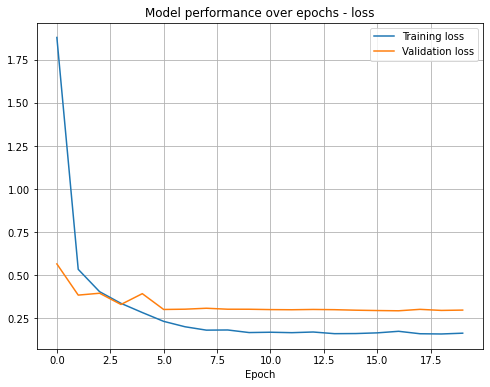

In [0]:
trainer_top20.plot_perf()

In [0]:
acc_df = trainer_top20.get_test_accuracy()

In [0]:
acc_df

,Top-1,Top-5
Average (Micro),87.46,95.78
Backpacks,98.32,100.00
Belts,99.07,99.07
Briefs,98.40,100.00
Casual Shoes,80.62,99.69
Flip Flops,85.29,99.26
Formal Shoes,92.45,98.92
Handbags,95.62,99.87
Heels,90.15,99.82
Jeans,99.26,99.63


In [0]:
print(acc_df.to_markdown())

|                       |   Top-1 |   Top-5 |
|:----------------------|--------:|--------:|
| Average (Micro)       |   87.46 |   95.78 |
| Backpacks             |   98.32 |  100    |
| Belts                 |   99.07 |   99.07 |
| Briefs                |   98.4  |  100    |
| Casual Shoes          |   80.62 |   99.69 |
| Flip Flops            |   85.29 |   99.26 |
| Formal Shoes          |   92.45 |   98.92 |
| Handbags              |   95.62 |   99.87 |
| Heels                 |   90.15 |   99.82 |
| Jeans                 |   99.26 |   99.63 |
| Kurtas                |   94.18 |  100    |
| Perfume and Body Mist |    0    |    0    |
| Sandals               |   85.24 |   99.76 |
| Shirts                |   98.08 |  100    |
| Socks                 |   92.27 |   98.9  |
| Sports Shoes          |   85.89 |   99.57 |
| Sunglasses            |  100    |  100    |
| Tops                  |   73.26 |  100    |
| Tshirts               |   92.29 |   99.95 |
| Wallets               |   97.02 

In [0]:
processor, trainer_ft, dataloaders_ft = setup_ft(processor=processor, ckpt_path=CKPT_PATH_FT, model=trainer_top20.get_best_model())

INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 4629 samples
INFO:fashion:Created val dataset with 1158 samples
INFO:fashion:Created test dataset with 5505 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
INFO:fashion:Creating trainer


In [0]:
# torch.cuda.empty_cache()
trainer_ft.train(30)

INFO:fashion:Running epoch 0/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 8.6612 Acc: 0.2560
INFO:fashion:train Task2 Acc: 0.8455 Task3 Acc: 0.5141
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 5.4774 Acc: 0.5225
INFO:fashion:val Task2 Acc: 0.9516 Task3 Acc: 0.7997
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 1/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 4.5345 Acc: 0.5533
INFO:fashion:train Task2 Acc: 0.9473 Task3 Acc: 0.7950
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 4.0441 Acc: 0.6321
INFO:fashion:val Task2 Acc: 0.9637 Task3 Acc: 0.8428
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 2/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 3.0494 Acc: 0.6621
INFO:fashion:train Task2 Acc: 0.9574 Task3 Acc: 0.8343
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 3.5177 Acc: 0.7107
INFO:fashion:val Task2 Acc: 0.9629 Task3 Acc: 0.8670
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 3/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 2.3141 Acc: 0.6909
INFO:fashion:train Task2 Acc: 0.9648 Task3 Acc: 0.8604
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 3.5183 Acc: 0.6494
INFO:fashion:val Task2 Acc: 0.9689 Task3 Acc: 0.8843
INFO:fashion:Running epoch 4/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.8164 Acc: 0.7388
INFO:fashion:train Task2 Acc: 0.9708 Task3 Acc: 0.8779
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 3.0977 Acc: 0.7254
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9016
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 5/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.3454 Acc: 0.7926
INFO:fashion:train Task2 Acc: 0.9739 Task3 Acc: 0.8944
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6557 Acc: 0.7781
INFO:fashion:val Task2 Acc: 0.9784 Task3 Acc: 0.9067
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 6/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.1835 Acc: 0.8259
INFO:fashion:train Task2 Acc: 0.9756 Task3 Acc: 0.9000
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7898 Acc: 0.7945
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9059
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 7/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.0815 Acc: 0.8391
INFO:fashion:train Task2 Acc: 0.9771 Task3 Acc: 0.9049
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8210 Acc: 0.7953
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9102
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 8/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.0772 Acc: 0.8427
INFO:fashion:train Task2 Acc: 0.9767 Task3 Acc: 0.9028
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7497 Acc: 0.7988
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9059
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 9/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.0413 Acc: 0.8537
INFO:fashion:train Task2 Acc: 0.9771 Task3 Acc: 0.9069
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6772 Acc: 0.8031
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9093
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 10/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9956 Acc: 0.8501
INFO:fashion:train Task2 Acc: 0.9780 Task3 Acc: 0.9097
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6929 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9059
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 11/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9699 Acc: 0.8529
INFO:fashion:train Task2 Acc: 0.9793 Task3 Acc: 0.9060
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8901 Acc: 0.7988
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9102
INFO:fashion:Running epoch 12/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9636 Acc: 0.8540
INFO:fashion:train Task2 Acc: 0.9797 Task3 Acc: 0.9082
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6545 Acc: 0.8048
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9085
INFO:fashion:Running epoch 13/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9601 Acc: 0.8514
INFO:fashion:train Task2 Acc: 0.9814 Task3 Acc: 0.9101
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6899 Acc: 0.8074
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9085
INFO:fashion:Running epoch 14/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9836 Acc: 0.8540
INFO:fashion:train Task2 Acc: 0.9797 Task3 Acc: 0.9071
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7809 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9085
INFO:fashion:Running epoch 15/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9347 Acc: 0.8520
INFO:fashion:train Task2 Acc: 0.9793 Task3 Acc: 0.9065
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7966 Acc: 0.8022
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9093
INFO:fashion:Running epoch 16/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9662 Acc: 0.8555
INFO:fashion:train Task2 Acc: 0.9795 Task3 Acc: 0.9086
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.9365 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9102
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 17/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9622 Acc: 0.8583
INFO:fashion:train Task2 Acc: 0.9797 Task3 Acc: 0.9106
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.5990 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9093
INFO:fashion:Running epoch 18/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9770 Acc: 0.8561
INFO:fashion:train Task2 Acc: 0.9806 Task3 Acc: 0.9058
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7717 Acc: 0.8117
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9119
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 19/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9432 Acc: 0.8602
INFO:fashion:train Task2 Acc: 0.9773 Task3 Acc: 0.9108
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7940 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9119
INFO:fashion:Running epoch 20/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9655 Acc: 0.8535
INFO:fashion:train Task2 Acc: 0.9767 Task3 Acc: 0.9049
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8057 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9102
INFO:fashion:Running epoch 21/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9686 Acc: 0.8561
INFO:fashion:train Task2 Acc: 0.9777 Task3 Acc: 0.9091
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8183 Acc: 0.8057
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9093
INFO:fashion:Running epoch 22/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9418 Acc: 0.8596
INFO:fashion:train Task2 Acc: 0.9799 Task3 Acc: 0.9086
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8721 Acc: 0.7997
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9059
INFO:fashion:Running epoch 23/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9614 Acc: 0.8535
INFO:fashion:train Task2 Acc: 0.9790 Task3 Acc: 0.9065
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.5479 Acc: 0.8109
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9102
INFO:fashion:Running epoch 24/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9650 Acc: 0.8490
INFO:fashion:train Task2 Acc: 0.9816 Task3 Acc: 0.9078
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6835 Acc: 0.8014
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9067
INFO:fashion:Running epoch 25/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9440 Acc: 0.8518
INFO:fashion:train Task2 Acc: 0.9810 Task3 Acc: 0.9097
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6906 Acc: 0.8048
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9076
INFO:fashion:Running epoch 26/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9927 Acc: 0.8540
INFO:fashion:train Task2 Acc: 0.9775 Task3 Acc: 0.9028
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7694 Acc: 0.8040
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9119
INFO:fashion:Running epoch 27/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9256 Acc: 0.8568
INFO:fashion:train Task2 Acc: 0.9806 Task3 Acc: 0.9129
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6837 Acc: 0.8057
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9128
INFO:fashion:Running epoch 28/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9301 Acc: 0.8617
INFO:fashion:train Task2 Acc: 0.9801 Task3 Acc: 0.9106
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6462 Acc: 0.8092
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9128
INFO:fashion:Running epoch 29/29
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9599 Acc: 0.8566
INFO:fashion:train Task2 Acc: 0.9790 Task3 Acc: 0.9078
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8962 Acc: 0.8074
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9128
INFO:fashion:Training complete in 34m 16s
INFO:fashion:Best val Acc: 0.811744
INFO:fashion:Setting model to the best one found during training


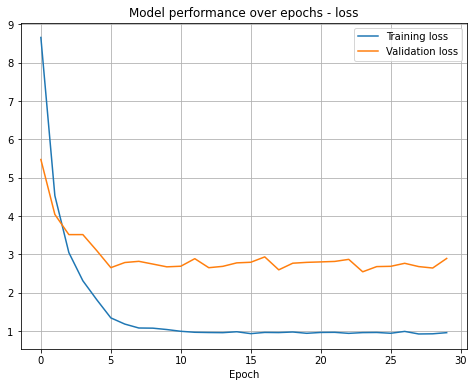

In [0]:
trainer_ft.plot_perf()

In [0]:
acc_df_ft = trainer_ft.get_test_accuracy()

In [0]:
acc_df_ft

,Top-1,Top-5
Average (Micro),45.54,62.80
Accessory Gift Set,100.00,100.00
Baby Dolls,0.00,0.00
Bangle,13.04,73.91
Basketballs,81.82,100.00
...,...,...
Umbrellas,100.00,100.00
Waist Pouch,0.00,69.23
Waistcoat,16.67,100.00
Water Bottle,100.00,100.00


In [0]:
print(acc_df_ft.to_markdown())

|                           |   Top-1 |   Top-5 |
|:--------------------------|--------:|--------:|
| Average (Micro)           |   45.54 |   62.8  |
| Accessory Gift Set        |  100    |  100    |
| Baby Dolls                |    0    |    0    |
| Bangle                    |   13.04 |   73.91 |
| Basketballs               |   81.82 |  100    |
| Bath Robe                 |    0    |    0    |
| Beauty Accessory          |    0    |    0    |
| Blazers                   |   -0    |   -0    |
| Body Lotion               |    0    |    0    |
| Body Wash and Scrub       |    0    |    0    |
| Booties                   |   -0    |   -0    |
| Boxers                    |   -0    |   -0    |
| Bra                       |   98.18 |   99.7  |
| Bracelet                  |   80.95 |  100    |
| Camisoles                 |   38.24 |   85.29 |
| Capris                    |   53.85 |   98.08 |
| Caps                      |   86.26 |   96.95 |
| Churidar                  |    0    |   75    |


In [0]:
acc_df_ft[acc_df_ft==-0] = 0

In [0]:
print(acc_df_ft.to_markdown())

|                           |   Top-1 |   Top-5 |
|:--------------------------|--------:|--------:|
| Average (Micro)           |   45.54 |   62.8  |
| Accessory Gift Set        |  100    |  100    |
| Baby Dolls                |    0    |    0    |
| Bangle                    |   13.04 |   73.91 |
| Basketballs               |   81.82 |  100    |
| Bath Robe                 |    0    |    0    |
| Beauty Accessory          |    0    |    0    |
| Blazers                   |    0    |    0    |
| Body Lotion               |    0    |    0    |
| Body Wash and Scrub       |    0    |    0    |
| Booties                   |    0    |    0    |
| Boxers                    |    0    |    0    |
| Bra                       |   98.18 |   99.7  |
| Bracelet                  |   80.95 |  100    |
| Camisoles                 |   38.24 |   85.29 |
| Capris                    |   53.85 |   98.08 |
| Caps                      |   86.26 |   96.95 |
| Churidar                  |    0    |   75    |


In [37]:
import torch.optim as optim

print(trainer_ft.optimizer)

for param_group in trainer_ft.optimizer.param_groups:
    print(param_group['lr'])

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.0001
    lr: 3.125e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
3.125e-06


In [0]:
optimizer = optim.SGD(trainer_ft.model.parameters(), lr=1e-4, momentum=0.9)
# Decay LR by a factor of 0.5 every 3 epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

trainer_ft.optimizer = optimizer
trainer_ft.scheduler = scheduler

In [31]:
trainer_ft.train(15)

INFO:fashion:Running epoch 0/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9728 Acc: 0.8527
INFO:fashion:train Task2 Acc: 0.9808 Task3 Acc: 0.9088
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7686 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9111
INFO:fashion:Running epoch 1/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9277 Acc: 0.8542
INFO:fashion:train Task2 Acc: 0.9797 Task3 Acc: 0.9071
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7391 Acc: 0.8066
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9085
INFO:fashion:Running epoch 2/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9054 Acc: 0.8589
INFO:fashion:train Task2 Acc: 0.9803 Task3 Acc: 0.9114
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8043 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9810 Task3 Acc: 0.9093
INFO:fashion:Running epoch 3/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9060 Acc: 0.8585
INFO:fashion:train Task2 Acc: 0.9810 Task3 Acc: 0.9093
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7457 Acc: 0.8178
INFO:fashion:val Task2 Acc: 0.9810 Task3 Acc: 0.9093
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 4/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8686 Acc: 0.8674
INFO:fashion:train Task2 Acc: 0.9793 Task3 Acc: 0.9138
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6008 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9093
INFO:fashion:Running epoch 5/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8732 Acc: 0.8656
INFO:fashion:train Task2 Acc: 0.9797 Task3 Acc: 0.9121
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.5805 Acc: 0.8083
INFO:fashion:val Task2 Acc: 0.9810 Task3 Acc: 0.9111
INFO:fashion:Running epoch 6/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8339 Acc: 0.8728
INFO:fashion:train Task2 Acc: 0.9821 Task3 Acc: 0.9149
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6390 Acc: 0.8161
INFO:fashion:val Task2 Acc: 0.9810 Task3 Acc: 0.9154
INFO:fashion:Running epoch 7/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8279 Acc: 0.8680
INFO:fashion:train Task2 Acc: 0.9827 Task3 Acc: 0.9157
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7501 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9128
INFO:fashion:Running epoch 8/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8325 Acc: 0.8723
INFO:fashion:train Task2 Acc: 0.9808 Task3 Acc: 0.9147
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7045 Acc: 0.8100
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9145
INFO:fashion:Running epoch 9/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8444 Acc: 0.8708
INFO:fashion:train Task2 Acc: 0.9827 Task3 Acc: 0.9166
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6039 Acc: 0.8126
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9111
INFO:fashion:Running epoch 10/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8108 Acc: 0.8762
INFO:fashion:train Task2 Acc: 0.9814 Task3 Acc: 0.9196
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.0644 Acc: 0.8161
INFO:fashion:val Task2 Acc: 0.9801 Task3 Acc: 0.9136
INFO:fashion:Running epoch 11/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7845 Acc: 0.8738
INFO:fashion:train Task2 Acc: 0.9829 Task3 Acc: 0.9196
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8211 Acc: 0.8126
INFO:fashion:val Task2 Acc: 0.9784 Task3 Acc: 0.9102
INFO:fashion:Running epoch 12/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8204 Acc: 0.8741
INFO:fashion:train Task2 Acc: 0.9821 Task3 Acc: 0.9211
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.8856 Acc: 0.8152
INFO:fashion:val Task2 Acc: 0.9810 Task3 Acc: 0.9102
INFO:fashion:Running epoch 13/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.8236 Acc: 0.8661
INFO:fashion:train Task2 Acc: 0.9823 Task3 Acc: 0.9140
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.7104 Acc: 0.8109
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9119
INFO:fashion:Running epoch 14/14
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7842 Acc: 0.8769
INFO:fashion:train Task2 Acc: 0.9834 Task3 Acc: 0.9214
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.6750 Acc: 0.8187
INFO:fashion:val Task2 Acc: 0.9793 Task3 Acc: 0.9119
INFO:fashion:--Saving checkpoint--


INFO:fashion:Training complete in 17m 4s
INFO:fashion:Best val Acc: 0.818653
INFO:fashion:Setting model to the best one found during training


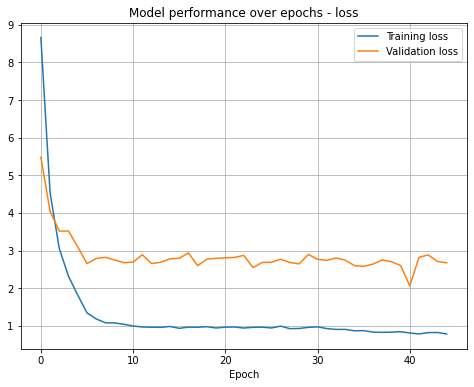

In [32]:
trainer_ft.plot_perf()

In [33]:
acc_df_ft = trainer_ft.get_test_accuracy()

In [34]:
acc_df_ft

,Top-1,Top-5
Average (Micro),46.23,62.92
Accessory Gift Set,100.00,100.00
Baby Dolls,0.00,0.00
Bangle,17.39,82.61
Basketballs,72.73,100.00
...,...,...
Umbrellas,100.00,100.00
Waist Pouch,0.00,69.23
Waistcoat,83.33,100.00
Water Bottle,100.00,100.00


In [0]:
acc_df_ft[acc_df_ft==-0] = 0

In [44]:
print(acc_df_ft.to_markdown())

|                           |   Top-1 |   Top-5 |
|:--------------------------|--------:|--------:|
| Average (Micro)           |   46.23 |   62.92 |
| Accessory Gift Set        |  100    |  100    |
| Baby Dolls                |    0    |    0    |
| Bangle                    |   17.39 |   82.61 |
| Basketballs               |   72.73 |  100    |
| Bath Robe                 |    0    |    0    |
| Beauty Accessory          |    0    |    0    |
| Blazers                   |    0    |    0    |
| Body Lotion               |    0    |    0    |
| Body Wash and Scrub       |    0    |    0    |
| Booties                   |    0    |    0    |
| Boxers                    |    0    |    0    |
| Bra                       |   98.18 |   99.7  |
| Bracelet                  |   85.71 |  100    |
| Camisoles                 |   35.29 |   88.24 |
| Capris                    |   53.85 |   98.08 |
| Caps                      |   87.79 |   96.95 |
| Churidar                  |   25    |  100    |
